In [53]:
# Dependencies and Setup
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

In [2]:
#Create df for traceability
df = pd.DataFrame(school_data_complete)

In [3]:
# Calculate the total number of unique schools
school_count = df['school_name'].nunique()
school_count

15

In [4]:
# Calculate the total number of students
student_count = df['student_name'].count()
student_count

39170

In [5]:
# Calculate the total budget
total_budget = school_data['budget'].sum()
total_budget

24649428

In [6]:
# Calculate the average (mean) math score
average_math_score = round(df['math_score'].mean(),2)
average_math_score

78.99

In [7]:
# Calculate the average (mean) reading score
average_reading_score = round(df['reading_score'].mean(),2)
average_reading_score

81.88

In [8]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = df[(df['math_score'] >= 70)].count()['student_name']
passing_math_percentage = round(passing_math_count / float(student_count) * 100,2)
passing_math_percentage

74.98

In [9]:
# Calculate the percentage of students who passeed reading (hint: look at how the math percentage was calculated)  
passing_reading_count = df[(df["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = round(passing_reading_count / float(student_count) * 100,2)
passing_reading_percentage

85.81

In [10]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = df[
    (df["math_score"] >= 70) & (df["reading_score"] >= 70)
].count()["student_name"]
overall_passing_rate = round(passing_math_reading_count /  float(student_count) * 100,2)
overall_passing_rate

65.17

In [11]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary = pd.DataFrame({"Total Schools" : [school_count], "Total Students" : [student_count],
                                     "Total Budget" : [total_budget], "Average Math Score" : [average_math_score],
                                         "Average Reading Score" : [average_reading_score],
                                             "% Passing Math" : [passing_math_percentage],
                                                 "% Passing Reading" : [passing_reading_percentage],
                                                     "% Overall Passing" : [overall_passing_rate] 
                                })
                                
# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.99,81.88,74.98,85.81,65.17


## School Summary

In [12]:
#Create dataframe with school_data
school_df = pd.DataFrame(school_data)
school_df

# Sort the dataframe in ascending alphabetical order
school_df_sorted = school_df.sort_values('school_name')
school_df_sorted

#Create vector of the list of school names 
school_names = school_df_sorted['school_name']
school_names

# Use the code provided to select the school type
school_types = school_df_sorted.set_index(['school_name'])['type']
school_types

# Calculate the total student count
per_school_counts = df.groupby(["school_name"]).count()["student_name"]
per_school_counts

# Calculate the total school budget 
per_school_budget = df.groupby(["school_name"]).mean()["budget"]
per_school_budget

# Calculate the total school budget and per capita spending
per_school_capita = per_school_budget / per_school_counts
per_school_capita

# Calculate the average test scores
per_school_math = df.groupby(["school_name"]).mean()["math_score"]
per_school_math

per_school_reading = df.groupby(["school_name"]).mean()["reading_score"]
per_school_reading

school_name
Bailey High School       81.033963
Cabrera High School      83.975780
Figueroa High School     81.158020
Ford High School         80.746258
Griffin High School      83.816757
Hernandez High School    80.934412
Holden High School       83.814988
Huang High School        81.182722
Johnson High School      80.966394
Pena High School         84.044699
Rodriguez High School    80.744686
Shelton High School      83.725724
Thomas High School       83.848930
Wilson High School       83.989488
Wright High School       83.955000
Name: reading_score, dtype: float64

In [13]:
per_school_counts

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: student_name, dtype: int64

In [14]:
# Calculate the number of schools with math scores of 70 or higher

school_passing_math = per_school_math >= 70
school_passing_math.count()


15

In [15]:
# Calculate the number of students at each school with a math_score of 70 or higher
df_pass_math = df[df.math_score >= 70]
n_pass_math = df_pass_math.groupby(['school_name']).count()['student_name']
n_pass_math

school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
Name: student_name, dtype: int64

In [16]:
# Calculate the number of schools with reading scores of 70 or higher
school_passing_reading = per_school_reading >= 70
school_passing_reading.count()

#n_sch_pass_read = school_passing_reading.count()
#n_sch_pass_read

15

In [17]:
# Calculate the number of students at each school with a reading_score of 70 or higher
df_pass_reading = df[df.reading_score >= 70]
n_pass_reading = df_pass_reading.groupby(['school_name']).count()['student_name']
n_pass_reading

school_name
Bailey High School       4077
Cabrera High School      1803
Figueroa High School     2381
Ford High School         2172
Griffin High School      1426
Hernandez High School    3748
Holden High School        411
Huang High School        2372
Johnson High School      3867
Pena High School          923
Rodriguez High School    3208
Shelton High School      1688
Thomas High School       1591
Wilson High School       2204
Wright High School       1739
Name: student_name, dtype: int64

In [18]:
# Use the provided code to calculate the schools that passed both math and reading with scores of 70 or higher
passing_math_and_reading = df['school_name'][
    (df["reading_score"] >= 70) & (df["math_score"] >= 70)]
passing_math_and_reading.nunique()

15

In [19]:
# Calculate the number of students at each school with a math_score & reading_score of 70 or higher
df_pass_both = df[(df.math_score >= 70) & (df.reading_score >= 70)]
n_pass_both = df_pass_both.groupby(['school_name']).count()['student_name']
n_pass_both

school_name
Bailey High School       2719
Cabrera High School      1697
Figueroa High School     1569
Ford High School         1487
Griffin High School      1330
Hernandez High School    2481
Holden High School        381
Huang High School        1561
Johnson High School      2549
Pena High School          871
Rodriguez High School    2119
Shelton High School      1583
Thomas High School       1487
Wilson High School       2068
Wright High School       1626
Name: student_name, dtype: int64

In [20]:
# Use the provided code to calculate the passing rates

per_school_passing_math = n_pass_math / per_school_counts * 100


per_school_passing_reading = n_pass_reading / per_school_counts * 100


overall_passing_rate = n_pass_both / per_school_counts * 100


In [21]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
per_school_summary = pd.DataFrame({'School Type': school_types,
                                        'Total Students' : per_school_counts,'Total School Budget' : per_school_budget,
                                            'Per Student Budget' : per_school_capita,'Average Math Score' : per_school_math,
                                               'Average Reading Score' : per_school_reading,'% Passing Math' : per_school_passing_math,
                                                   '% Passing Reading' : per_school_passing_reading,'% Overall Passing' : overall_passing_rate      
                                  })
# Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
# Binning will not work if 'Per Student Budget' is formatted with a '$' 
# per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the DataFrame
per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",581.0,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",650.0,77.072464,80.966394,66.057551,81.222432,53.539172


## Highest-Performing Schools (by % Overall Passing)

In [22]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_schools = per_school_summary.sort_values('% Overall Passing', ascending=False)
top_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",638.0,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",578.0,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",609.0,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

In [23]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
bottom_schools = per_school_summary.sort_values('% Overall Passing', ascending=True)
bottom_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Rodriguez High School,District,3999,"$2,547,363.00",637.0,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",650.0,77.072464,80.966394,66.057551,81.222432,53.539172


## Math Scores by Grade

In [24]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by "school_name" and take the mean of each.
ninth_graders_scores = ninth_graders.groupby(['school_name']).mean()[['math_score','reading_score']].round(2)
tenth_graders_scores = tenth_graders.groupby(['school_name']).mean()[['math_score','reading_score']].round(2)
eleventh_graders_scores = eleventh_graders.groupby(['school_name']).mean()[['math_score','reading_score']].round(2)
twelfth_graders_scores = twelfth_graders.groupby(['school_name']).mean()[['math_score','reading_score']].round(2)

# Use the code to select only the `math_score`.
ninth_grade_math_scores = ninth_graders_scores["math_score"]
tenth_grader_math_scores = tenth_graders_scores["math_score"]
eleventh_grader_math_scores = eleventh_graders_scores["math_score"]
twelfth_grader_math_scores = twelfth_graders_scores["math_score"]

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade = pd.DataFrame({'9th' : ninth_grade_math_scores,'10th' : tenth_grader_math_scores,
                                         '11th': eleventh_grader_math_scores, '12th' : twelfth_grader_math_scores
                                    })
# Minor data wrangling
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.08,77.00,77.52,76.49
Cabrera High School,83.09,83.15,82.77,83.28
Figueroa High School,76.40,76.54,76.88,77.15
Ford High School,77.36,77.67,76.92,76.18
Griffin High School,82.04,84.23,83.84,83.36
Hernandez High School,77.44,77.34,77.14,77.19
Holden High School,83.79,83.43,85.00,82.86
Huang High School,77.03,75.91,76.45,77.23
Johnson High School,77.19,76.69,77.49,76.86
Pena High School,83.63,83.37,84.33,84.12


## Reading Score by Grade 

In [25]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by "school_name" and take the mean of each.
ninth_graders_scores = ninth_graders.groupby(['school_name']).mean()[['math_score','reading_score']].round(2)
tenth_graders_scores = tenth_graders.groupby(['school_name']).mean()[['math_score','reading_score']].round(2)
eleventh_graders_scores = eleventh_graders.groupby(['school_name']).mean()[['math_score','reading_score']].round(2)
twelfth_graders_scores = twelfth_graders.groupby(['school_name']).mean()[['math_score','reading_score']].round(2)

# Use the code to select only the `reading_score`.
ninth_grade_reading_scores = ninth_graders_scores["reading_score"]
tenth_grader_reading_scores = tenth_graders_scores["reading_score"]
eleventh_grader_reading_scores = eleventh_graders_scores["reading_score"]
twelfth_grader_reading_scores = twelfth_graders_scores["reading_score"]

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({'9th' : ninth_grade_reading_scores,'10th' : tenth_grader_reading_scores,
                                         '11th': eleventh_grader_reading_scores, '12th' : twelfth_grader_reading_scores
                                    })

# Minor data wrangling
reading_scores_by_grade = reading_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.30,80.91,80.95,80.91
Cabrera High School,83.68,84.25,83.79,84.29
Figueroa High School,81.20,81.41,80.64,81.38
Ford High School,80.63,81.26,80.40,80.66
Griffin High School,83.37,83.71,84.29,84.01
Hernandez High School,80.87,80.66,81.40,80.86
Holden High School,83.68,83.32,83.82,84.70
Huang High School,81.29,81.51,81.42,80.31
Johnson High School,81.26,80.77,80.62,81.23
Pena High School,83.81,83.61,84.34,84.59


## Scores by School Spending

In [26]:
# Establish the bins 
spending_bins = [0, 585, 630, 645, 680]
spending_labels = ["<$585", "$585-630", "$630-645", "$645-680"]

In [27]:
# Create a copy of the school summary since it has the "Per Student Budget" 
school_spending_df = per_school_summary.copy()

In [28]:
# Use `pd.cut` to categorize spending based on the bins.
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df['Per Student Budget'], spending_bins, labels = spending_labels , include_lowest=True)
school_spending_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
school_name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",628.0,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630
Cabrera High School,Charter,1858,"$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,2949,"$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
Ford High School,District,2739,"$1,763,916.00",644.0,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,1468,"$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630
Hernandez High School,District,4635,"$3,022,020.00",652.0,77.289752,80.934412,66.752967,80.862999,53.527508,$645-680
Holden High School,Charter,427,"$248,087.00",581.0,83.803279,83.814988,92.505855,96.252927,89.227166,<$585
Huang High School,District,2917,"$1,910,635.00",655.0,76.629414,81.182722,65.683922,81.316421,53.513884,$645-680
Johnson High School,District,4761,"$3,094,650.00",650.0,77.072464,80.966394,66.057551,81.222432,53.539172,$645-680


In [29]:
#  Calculate averages for the desired columns. 
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"].round(2)
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"].round(2)
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"].round(2)
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"].round(2)
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"].round(2)

In [30]:
# Assemble into DataFrame
spending_summary = pd.DataFrame({"Average Math Score":spending_math_scores,"Average Reading Score":spending_reading_scores,
                                 "% Passing Math":spending_passing_math,"% Passing Reading":spending_passing_reading,
                                 "% Overall Passing":overall_passing_spending
                                })
# Display results
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.46,83.93,93.46,96.61,90.37
$585-630,81.90,83.16,87.13,92.72,81.42
$630-645,78.52,81.62,73.48,84.39,62.86
$645-680,77.00,81.03,66.16,81.13,53.53


## Scores by School Size

(array([0, 1, 2, 3]),
 [Text(0, 0, '<$585'),
  Text(1, 0, '$585-630'),
  Text(2, 0, '$630-645'),
  Text(3, 0, '$645-680')])

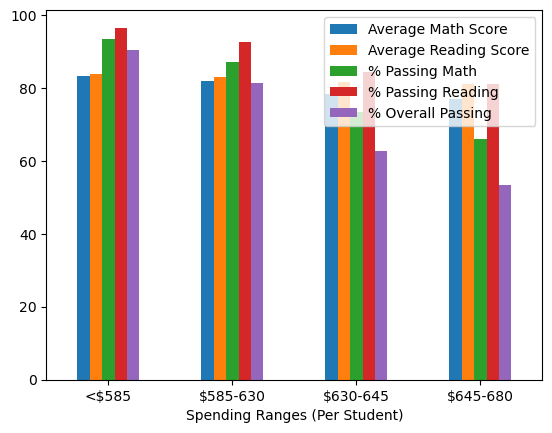

In [49]:
spending_summary.plot.bar()
plt.xticks(rotation=0)

In [31]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
size_labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [32]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.
per_school_summary["School Size"] = pd.cut(per_school_summary['Total Students'],size_bins,labels=size_labels,include_lowest=True)
per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,School Size
school_name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",628.0,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",644.0,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020.00",652.0,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000)
Holden High School,Charter,427,"$248,087.00",581.0,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000)
Huang High School,District,2917,"$1,910,635.00",655.0,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",650.0,77.072464,80.966394,66.057551,81.222432,53.539172,Large (2000-5000)


In [33]:
# Calculate averages for the desired columns. 
size_math_scores = per_school_summary.groupby(["School Size"]).mean()["Average Math Score"].round(2)
size_reading_scores = per_school_summary.groupby(["School Size"]).mean()["Average Reading Score"].round(2)
size_passing_math = per_school_summary.groupby(["School Size"]).mean()["% Passing Math"].round(2)
size_passing_reading = per_school_summary.groupby(["School Size"]).mean()["% Passing Reading"].round(2)
size_overall_passing = per_school_summary.groupby(["School Size"]).mean()["% Overall Passing"].round(2)

In [34]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
size_summary = pd.DataFrame({"Average Math Score":size_math_scores,"Average Reading Score":size_reading_scores,
                                 "% Passing Math":size_passing_math,"% Passing Reading":size_passing_reading,
                                 "% Overall Passing":size_overall_passing
                                })
# Display results
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.82,83.93,93.55,96.10,89.88
Medium (1000-2000),83.37,83.86,93.60,96.79,90.62
Large (2000-5000),77.75,81.34,69.96,82.77,58.29


(array([0, 1, 2]),
 [Text(0, 0, 'Small (<1000)'),
  Text(1, 0, 'Medium (1000-2000)'),
  Text(2, 0, 'Large (2000-5000)')])

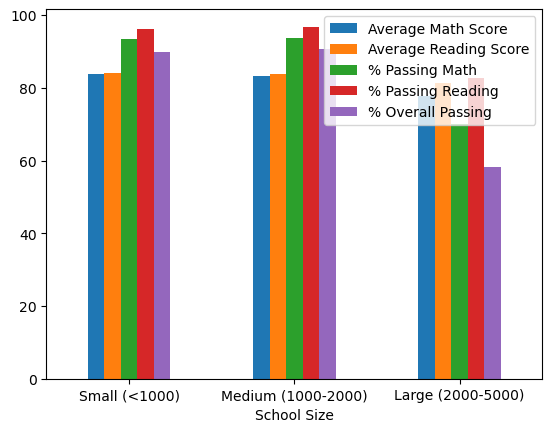

In [42]:
size_summary.plot.bar()
plt.xticks(rotation=0)

## Scores by School Type

In [46]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
type_math_scores = per_school_summary.groupby(["School Type"]).mean()["Average Math Score"].round(2)
type_reading_scores = per_school_summary.groupby(["School Type"]).mean()["Average Reading Score"].round(2)
type_passing_math = per_school_summary.groupby(["School Type"]).mean()["% Passing Math"].round(2)
type_passing_reading = per_school_summary.groupby(["School Type"]).mean()["% Passing Reading"].round(2)
type_overall_passing = per_school_summary.groupby(["School Type"]).mean()["% Overall Passing"].round(2)

# Use the code provided to select new column data
#average_math_score_by_type = type_math_scores["Average Math Score"]
#average_reading_score_by_type = type_reading_scores["Average Reading Score"]
#average_percent_passing_math_by_type = type_passing_math["% Passing Math"]
#average_percent_passing_reading_by_type = type_passing_reading["% Passing Reading"]
#average_percent_overall_passing_by_type = type_overall_passing["% Overall Passing"]

In [47]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary = pd.DataFrame({"Average Math Score":type_math_scores,"Average Reading Score":type_reading_scores,
                                 "% Passing Math":type_passing_math,"% Passing Reading":type_passing_reading,
                                 "% Overall Passing":type_overall_passing
                                })
# Display results
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.47,83.90,93.62,96.59,90.43
District,76.96,80.97,66.55,80.80,53.67


(array([0, 1]), [Text(0, 0, 'Charter'), Text(1, 0, 'District')])

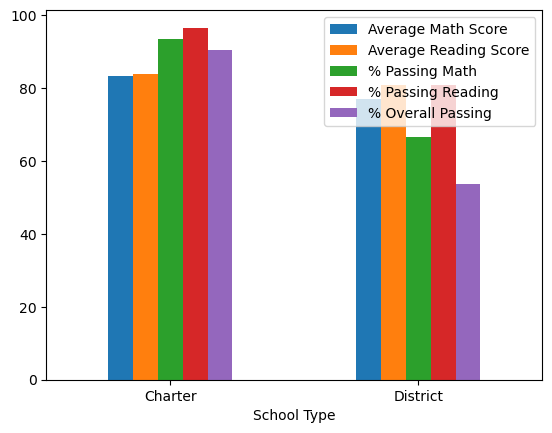

In [48]:
type_summary.plot.bar()
plt.xticks(rotation=0)

In [57]:
report = ("PyCity Schools Analysis:"
"\n---------------------------"
"\n Overall, schools with larger budgets, did not show better"
"\ntest results. In terms of average test scores in math and reading,"
"\nschools that spent more per student ($645-$675) actually underperformed"
"\nagainst schools that spent markedly less per student ($585 per student)."
"\n(see spending_summary table)"
"\n------------------------------------------------------------------------"
"\nLarge schools underperformed in terms of % passing math, reading,"
"\nand overall when compared to smaller and medium-sized schools. In terms,"
"\nof % overall passing small and medium-sized schools out-performed large-sized"
"\nschools with 90-91% passing vs. 58%, respectively. (see size_summary table)"
"\n------------------------------------------------------------------------"
"\nLastly, Charter schools out-performed District schools on all measures:" 
"\naverage test stores in both subject areas and % passing rates."
"\n------------------------------------------------------------------------"
"\nFurther data collection and statistical analysis will be required to advance"
"\nthis research from descriptive to inferential. However, these intial findings"
"\nsupport concentrating the school board's attention on larger-budget, larger-"
"\nsized, and District schools to better understand why they are underperforming" 
"\nand how to facilitate improvements."
"\n------------------------------------------------------------------------"
"\n-Report by Ethan Wright")
print(report)

#Write results into .txt file, joining path with analysis folder and file name
with open (os.path.join("PyCity_Report.txt"), 'w') as file:
    file.write(report)
    file.close()
    pass

PyCity Schools Analysis:
---------------------------
 Overall, schools with larger budgets, did not show better
test results. In terms of average test scores in math and reading,
schools that spent more per student ($645-$675) actually underperformed
against schools that spent markedly less per student ($585 per student).
(see spending_summary table)
------------------------------------------------------------------------
Large schools underperformed in terms of % passing math, reading,
and overall when compared to smaller and medium-sized schools. In terms,
of % overall passing small and medium-sized schools out-performed large-sized
schools with 90-91% passing vs. 58%, respectively. (see size_summary table)
------------------------------------------------------------------------
Lastly, Charter schools out-performed District schools on all measures:
average test stores in both subject areas and % passing rates.
------------------------------------------------------------------------
